# Linear Correlation Analysis | How it relates to variance

The correlation coefficient of two series  $X$  and  $Y$  is defined as

$r=\dfrac{Cov(X,Y)}{std(X)std(Y)}$
 
where  $Cov$  is the covariance and  $std$  is the standard deviation.

Two random sets of data will have a correlation coefficient close to 0:

## Correlation vs. Covariance
Correlation is simply a normalized form of covariance.

### Covariance isn't that meaningful by itself

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

np.random.seed(seed=42)

In [20]:
X = np.random.rand(50)
Y = 2 * X + np.random.normal(0, 0.1, 50)

np.cov(X, Y)[0, 1]

0.16865601367753788

 Once we've normalized the metric to the -1 to 1 scale, we can make meaningful statements and compare correlations.

In [21]:
X = np.random.rand(50)
Y = 2 * X + 4

print('Covariance of X and Y: \n' + str(np.cov(X, Y)))
print('Correlation of X and Y: \n' + str(np.corrcoef(X, Y)))

Covariance of X and Y: 
[[0.07941322 0.15882643]
 [0.15882643 0.31765286]]
Correlation of X and Y: 
[[1. 1.]
 [1. 1.]]


In [22]:
cov_matrix = np.cov(X, Y)

# We need to manually set the degrees of freedom on X to 1, as numpy defaults to 0 for variance
# This is usually fine, but will result in a slight mismatch as np.cov defaults to 1
error = cov_matrix[0, 0] - X.var(ddof=1)

print('error: ' + str(error))

error: 0.0


Correlation: 0.10361780913186487
Built-in Correlation: 0.1015454529492276


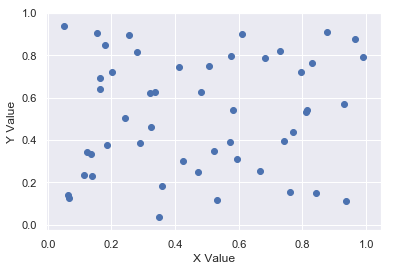

In [23]:
X = np.random.rand(50)
Y = np.random.rand(50)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')

# taking the relevant value from the matrix returned by np.cov
print('Correlation: ' + str(np.cov(X,Y)[0,1]/(np.std(X)*np.std(Y))))
# Let's also use the builtin correlation function
print('Built-in Correlation: ' + str(np.corrcoef(X, Y)[0, 1]))

Now let's see what two correlated sets of data look like.

Correlation: 0.9388817149748241


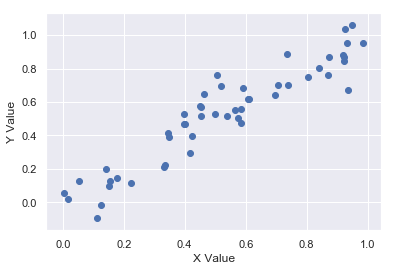

In [24]:
X = np.random.rand(50)
Y = X + np.random.normal(0, 0.1, 50)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')

print('Correlation: ' + str(np.corrcoef(X, Y)[0, 1]))

Let's dial down the relationship by introducing more noise.

Correlation: 0.8105973338408493


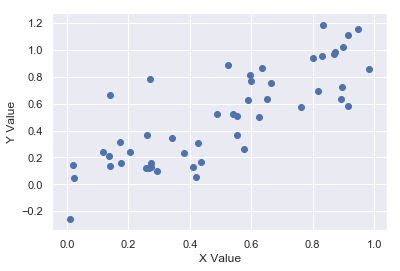

In [25]:
X = np.random.rand(50)
Y = X + np.random.normal(0, 0.2, 50)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')

print('Correlation: ' + str(np.corrcoef(X, Y)[0, 1]))

Finally, let's see what an inverse relationship looks like.

Correlation: -0.9551111569047426


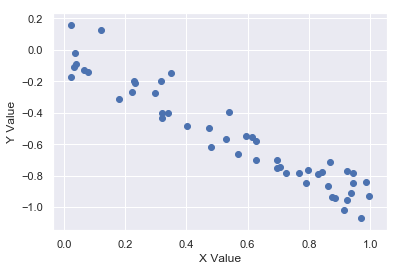

In [26]:
X = np.random.rand(50)
Y = -X + np.random.normal(0, 0.1, 50)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')

print('Correlation: ' + str(np.corrcoef(X, Y)[0, 1]))

## How is this useful in finance?

### Determining related assets

In [28]:
from nsepy import get_history
from datetime import date, datetime, timedelta

In [53]:
%%time
# Pull the pricing data for our two stocks and NIFTY 50
start = date(2015,1,1)
end = date(2019,3,1)

bench = get_history(symbol="NIFTY 50",
                            start=start,
                            end=end,
                            index=True)
bench = bench['Close'].copy()

a1 = get_history(symbol="TCS", start=start, end=end)
a1 = a1['Close'].copy()

a2 = get_history(symbol="YESBANK", start=start, end=end)
a2 = a2['Close'].copy()

CPU times: user 3.83 s, sys: 569 ms, total: 4.4 s
Wall time: 3.99 s


Correlation coefficients
TCS and YESBANK:  0.07526732984823337
TCS and NIFTY 50:  -0.11713540772280254
YESBANK and NIFTY 50:  -0.4707348844571141


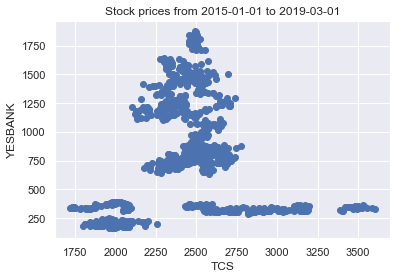

In [54]:
plt.scatter(a1,a2)
plt.xlabel('TCS')
plt.ylabel('YESBANK')
plt.title('Stock prices from ' + str(start) + ' to ' + str(end));
print("Correlation coefficients")
print("TCS and YESBANK: ", np.corrcoef(a1,a2)[0,1])
print("TCS and NIFTY 50: ", np.corrcoef(a1,bench)[0,1])
print("YESBANK and NIFTY 50: ", np.corrcoef(bench,a2)[0,1])

## Limitations

### Significance 


It's hard to rigorously determine whether or not a correlation is significant, especially when, as here, the variables are not normally distributed. 

One fundamental problem is that it is easy to datamine correlations by picking the right time period. To avoid this, one should compute the correlation of two quantities over many historical time periods and examine the distibution of the correlation coefficient.

Let's take the rolling 60 day correlation between the two to see how that varies.

In [58]:
pd.__version__

'0.23.4'

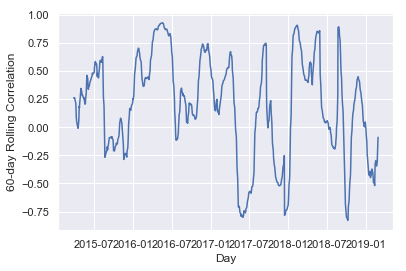

In [64]:
rolling_correlation = a1.rolling(60).corr(a2)
plt.plot(rolling_correlation)
plt.xlabel('Day')
plt.ylabel('60-day Rolling Correlation');

### Non-Linear Relationships

For instance, one variable might precisely follow the behavior of a second, but with a delay. There are techniques for dealing with this lagged correlation. Alternatively, a variable may be related to the rate of change of another. Neither of these relationships are linear, but can be very useful if detected.

Additionally, the correlation coefficient can be very sensitive to outliers. This means that including or excluding even a couple of data points can alter your result, and it is not always clear whether these points contain information or are simply noise.

As an example, let's make the noise distribution poisson rather than normal and see what happens.

0.38202923617805895

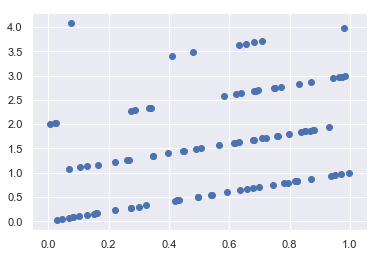

In [65]:
X = np.random.rand(100)
Y = X + np.random.poisson(size=100)

plt.scatter(X, Y)

np.corrcoef(X, Y)[0, 1]